# Paper Graphics

In [1]:
# this file's version
from datetime import datetime as dt
print("Notebook version as of", dt.today().date())

Notebook version as of 2018-11-23


In [2]:
import os

cwd = os.getcwd()
plotsavepath = cwd[cwd.rfind("/")+1:] + "/figures/"
if not os.path.exists("figures"):
    os.mkdir("figures")
print(plotsavepath)

datapath = cwd[cwd.rfind("/")+1:] + "/data/"
if not os.path.exists("data"):
    os.mkdir("data")
print(datapath)

publicationgraphics/figures/
publicationgraphics/data/


## Imports

In [3]:
cd ../aei

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei


In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import os
import pickle

np.set_printoptions(suppress=True)
from matplotlib.ticker import MaxNLocator

In [5]:
cd agents/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/agents


In [6]:
from detQ import detQ
from jacobiQ import JacobiQ

from detAC import detAC
from jacobiAC import JacobiAC

from detSARSA import detSARSA
from jacobiSARSA import JacobiSARSA

In [7]:
cd ../envs/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/envs


In [8]:
from Env_2StatePD import TwoStatePD
from Env_2StateMatchingPennies import TwoStateMatchingPennies

from Env_alt_2StatePD import TwoStatePD as TwoStatePD_
from Env_alt_1StatePD import OneStatePD

## Parameters

In [9]:
cd ../../

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public


In [10]:
Rpd = TwoStatePD().RewardTensor()
Tpd = TwoStatePD().TransitionTensor()

In [11]:
Rmp = TwoStateMatchingPennies().RewardTensor()
Tmp = TwoStateMatchingPennies().TransitionTensor()

In [12]:
b1=10
b2=2
c=1

Rpd_ = TwoStatePD_(b1,b2,c).RewardTensor()
Tpd_ = TwoStatePD_(b1,b2,c).TransitionTensor()

Rpd_1 = OneStatePD(b1,c).RewardTensor()
Tpd_1 = OneStatePD(b1,c).TransitionTensor()

Rpd_2 = OneStatePD(b2,c).RewardTensor()
Tpd_2 = OneStatePD(b2,c).TransitionTensor()

In [13]:
def obt_behavior(X000, X100, X010, X110):
    Xinit = np.zeros((2,2,2))
    Xinit[0, 0, 0] = X000
    Xinit[1, 0, 0] = X100
    Xinit[0, 1, 0] = X010
    Xinit[1, 1, 0] = X110

    Xinit[0, 0, 1] = 1.0 - Xinit[0, 0, 0]
    Xinit[1, 0, 1] = 1.0 - Xinit[1, 0, 0]
    Xinit[0, 1, 1] = 1.0 - Xinit[0, 1, 0]
    Xinit[1, 1, 1] = 1.0 - Xinit[1, 1, 0]
    
    return Xinit

def obt_behavior_s0(X000, X100):
    Xinit = np.zeros((2,1,2))
    Xinit[0, 0, 0] = X000
    Xinit[1, 0, 0] = X100

    Xinit[0, 0, 1] = 1.0 - Xinit[0, 0, 0]
    Xinit[1, 0, 1] = 1.0 - Xinit[1, 0, 0]
    
    return Xinit

In [14]:
def fs(a):
    return str(a).replace(".", "o")

def f(Xkeep):
    return Xkeep[:,:,0,0,0] +\
        2 * Xkeep[:,:,1,0,0] +\
        4 * Xkeep[:,:,0,1,0] +\
        8 * Xkeep[:,:,1,1,0]

In [15]:
learnerfontsize=12
blw, tlw = 2.5, 1  # bold line width, thin line width
Qcol, ACcol, Scol = "green", "red", "blue"

In [16]:
run aei/utils/QuiverPlot.py

## MP Phase Space - low gamma

<IPython.core.display.Javascript object>


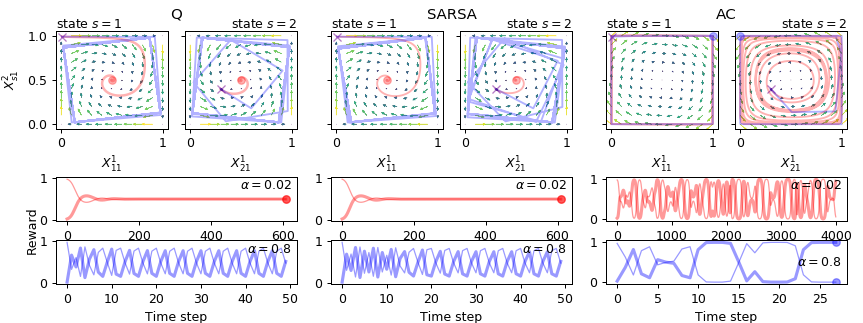

/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


In [17]:
# Parameters
QWhat = "TDe"
# ATypes = ["Q", "S", "A"]
alphas = [0.016, 0.64]
alphas = [0.02, 0.8]
beta = 5.0
gamma = 0.1

pAs = [0.0, 0.1, 0.2, 0.3, 0.4,
       0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # for real
#pAs = [0.0, 0.3, 0.6, 1.0] # for testing

fsf = 0.6
fig = plt.figure(figsize=(fsf*16, fsf*6))

left, right, bottom, top = 0.065, 0.98, 0.12, 0.9
hspace, wspace = 0.06, 0.02
w = (right-left-7*wspace) / 6
m = 0.6   # middle
uh = top - m  # upper hight
Nr = 2  # Nr of trajectory axes 
lh = (m - bottom - 2.5*hspace - (Nr-1)*hspace) / Nr


#
# AXES
#
axA0 = fig.add_axes((left, m, w, uh))
axA1 = fig.add_axes((left+1*w+1*wspace, m, w, uh), yticklabels=[])
axB0 = fig.add_axes((left+2*w+3*wspace, m, w, uh), yticklabels=[])
axB1 = fig.add_axes((left+3*w+4*wspace, m, w, uh), yticklabels=[])
axC0 = fig.add_axes((left+4*w+6*wspace, m, w, uh), yticklabels=[])
axC1 = fig.add_axes((left+5*w+7*wspace, m, w, uh), yticklabels=[])

tw = 2*w+wspace  # trajectory width
axAT0 = fig.add_axes((left, bottom+1*lh+1*hspace, tw, lh))
axAT1 = fig.add_axes((left, bottom, tw, lh))
axBT0 = fig.add_axes((left+2*w+3*wspace, bottom+1*lh+1*hspace, tw, lh))
axBT1 = fig.add_axes((left+2*w+3*wspace, bottom, tw, lh))
axCT0 = fig.add_axes((left+4*w+6*wspace, bottom+1*lh+1*hspace, tw, lh))
axCT1 = fig.add_axes((left+4*w+6*wspace, bottom, tw, lh))


#
# Quiver Plots
#
agentsQ = detQ(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsQ, difftype=QWhat, axes=[axA0, axA1], pAs=pAs)
axA1.annotate("Q", (left+1*w+0.5*wspace, top+0.5*hspace),
              fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axA0.annotate(r"state $s=1$", (left, top), textcoords="figure fraction",
              ha="left", va="bottom")
axA0.set_title("")
axA1.annotate(r"state $s=2$", (left+2*w+1*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axA1.set_title("")
axA0.set_xlabel(r"$X^1_{11}$")
axA1.set_xlabel(r"$X^1_{21}$")
axA0.set_ylabel(r"$X^2_{s1}$")

agentsS = detSARSA(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsS, difftype=QWhat, axes=[axB0, axB1], pAs=pAs)
axB1.annotate("SARSA", (left+3*w+3.5*wspace, top+0.5*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axB0.annotate(r"state $s=1$", (left+2*w+3*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axB0.set_title("")
axB1.annotate(r"state $s=2$", (left+4*w+4*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axB1.set_title("")
axB0.set_xlabel(r"$X^1_{11}$")
axB1.set_xlabel(r"$X^1_{21}$")
axB0.set_ylabel(r"")

agentsA = detAC(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsA, difftype=QWhat, axes=[axC0, axC1], pAs=pAs)
axC1.annotate("AC", (left+5*w+6.5*wspace, top+0.5*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axC0.annotate(r"state $s=1$", (left+4*w+6*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axC0.set_title("")
axC1.annotate(r"state $s=2$", (left+6*w+7*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axC1.set_title("")
axC0.set_xlabel(r"$X^1_{11}$")
axC1.set_xlabel(r"$X^1_{21}$")
axC0.set_ylabel(r"")


#
# Trajectories
# 
X = obt_behavior(X000=0.01, X100=0.99, X010=0.3, X110=0.4)

col, ls, alQ, alT = "red", "-", 0.3, 0.4
blw, tlw = 2.5, 1  # bold line width, thin line width
rt, fpr = plot_trajectory(agentsQ, X, axes=[axA0, axA1],
                          color=col, linestyle=ls, lw=2, alpha=alQ, Tmax=2000)
axAT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)

if fpr:
    axAT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)
    
# -----------------------------------------------------------------------------
col = "blue"
agentsQ1 = detQ(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsQ1, X, axes=[axA0, axA1],
                           color=col, linestyle=ls, alpha=alQ, Tmax=50)
axAT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axAT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

    
# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsS, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=2000)
axBT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsS1 = detSARSA(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsS1, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=50)
axBT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsA, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=4000)
axCT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsA1 = detAC(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsA1, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=200)
axCT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

    

"""
X2 = obt_behavior(X000=0.1, X100=0.1, X010=0.1, X110=0.1)
rt = plot_trajectory(T, R, alphas[0], beta, gamma,  
                     X2, learningtype="A", axes=[axC0, axC1],
                     color="blue", linestyle="-", alpha=0.3, Tmax=4000)
axCT0.plot(rt, linestyle="-", color="blue", alpha=0.4)
"""

axAT1.set_xlabel("Time step")
axBT1.set_xlabel("Time step")
axCT1.set_xlabel("Time step")

axAT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axCT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axAT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axCT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.5), xycoords="axes fraction",
               ha="right", va="center")

axAT0.annotate("Reward", (left-wspace, bottom+lh+0.5*hspace), xycoords="figure fraction",
               ha="right", va="center", rotation=90)



plt.savefig(plotsavepath +  "MP_PS_beta{}_gamma{}.png".format(fs(beta), fs(gamma)), dpi=300)


## MP Phase Space - high gamma

<IPython.core.display.Javascript object>


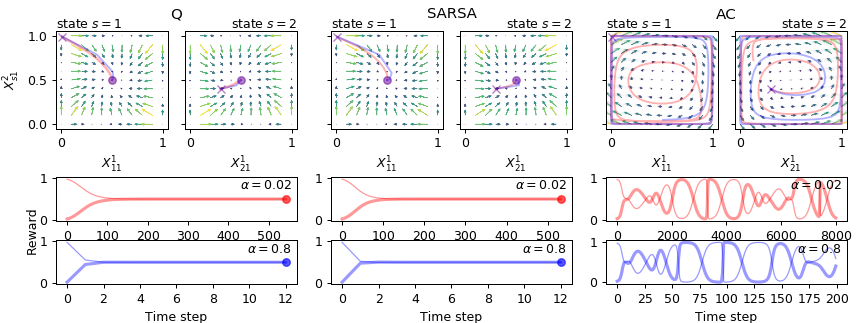

/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


In [18]:
# Parameters
QWhat = "TDe"
# ATypes = ["Q", "S", "A"]
alphas = [0.016, 0.64]
alphas = [0.02, 0.8]
beta = 5.0
gamma = 0.9

pAs = [0.0, 0.1, 0.2, 0.3, 0.4,
       0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # for real
#pAs = [0.0, 0.3, 0.6, 1.0] # for testing

#R = TwoStateMatchingPennies().RewardTensor()
#T = TwoStateMatchingPennies().TransitionTensor()


fsf = 0.6
fig = plt.figure(figsize=(fsf*16, fsf*6))

left, right, bottom, top = 0.065, 0.98, 0.12, 0.9
hspace, wspace = 0.06, 0.02
w = (right-left-7*wspace) / 6
m = 0.6   # middle
uh = top - m  # upper hight
Nr = 2  # Nr of trajectory axes 
lh = (m - bottom - 2.5*hspace - (Nr-1)*hspace) / Nr




#
# AXES
#
axA0 = fig.add_axes((left, m, w, uh))
axA1 = fig.add_axes((left+1*w+1*wspace, m, w, uh), yticklabels=[])
axB0 = fig.add_axes((left+2*w+3*wspace, m, w, uh), yticklabels=[])
axB1 = fig.add_axes((left+3*w+4*wspace, m, w, uh), yticklabels=[])
axC0 = fig.add_axes((left+4*w+6*wspace, m, w, uh), yticklabels=[])
axC1 = fig.add_axes((left+5*w+7*wspace, m, w, uh), yticklabels=[])

tw = 2*w+wspace  # trajectory width
axAT0 = fig.add_axes((left, bottom+1*lh+1*hspace, tw, lh))
axAT1 = fig.add_axes((left, bottom, tw, lh))
axBT0 = fig.add_axes((left+2*w+3*wspace, bottom+1*lh+1*hspace, tw, lh))
axBT1 = fig.add_axes((left+2*w+3*wspace, bottom, tw, lh))
axCT0 = fig.add_axes((left+4*w+6*wspace, bottom+1*lh+1*hspace, tw, lh))
axCT1 = fig.add_axes((left+4*w+6*wspace, bottom, tw, lh))


#
# Quiver Plots
#
agentsQ = detQ(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsQ, difftype=QWhat, axes=[axA0, axA1], pAs=pAs)
axA1.annotate("Q", (left+1*w+0.5*wspace, top+0.5*hspace),
              fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axA0.annotate(r"state $s=1$", (left, top), textcoords="figure fraction", ha="left", va="bottom")
axA0.set_title("")
axA1.annotate(r"state $s=2$", (left+2*w+1*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axA1.set_title("")
axA0.set_xlabel(r"$X^1_{11}$")
axA1.set_xlabel(r"$X^1_{21}$")
axA0.set_ylabel(r"$X^2_{s1}$")

agentsS = detSARSA(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsS, difftype=QWhat, axes=[axB0, axB1], pAs=pAs)
axB1.annotate("SARSA", (left+3*w+3.5*wspace, top+0.55*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axB0.annotate(r"state $s=1$", (left+2*w+3*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axB0.set_title("")
axB1.annotate(r"state $s=2$", (left+4*w+4*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axB1.set_title("")
axB0.set_xlabel(r"$X^1_{11}$")
axB1.set_xlabel(r"$X^1_{21}$")
axB0.set_ylabel(r"")

agentsA = detAC(Tmp, Rmp, alphas[0], beta, gamma)
axes = plot_quiver(agentsA, difftype=QWhat, axes=[axC0, axC1], pAs=pAs)
axC1.annotate("AC", (left+5*w+6.5*wspace, top+0.5*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axC0.annotate(r"state $s=1$", (left+4*w+6*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axC0.set_title("")
axC1.annotate(r"state $s=2$", (left+6*w+7*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axC1.set_title("")
axC0.set_xlabel(r"$X^1_{11}$")
axC1.set_xlabel(r"$X^1_{21}$")
axC0.set_ylabel(r"")


#
# Trajectories
# 
X = obt_behavior(X000=0.01, X100=0.99, X010=0.3, X110=0.4)

col, ls, alQ, alT = "red", "-", 0.3, 0.4
blw, tlw = 2.5, 1  # bold line width, thin line width
rt, fpr = plot_trajectory(agentsQ, X, axes=[axA0, axA1],
                          color=col, linestyle=ls, lw=2, alpha=alQ, Tmax=2000)
axAT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)

if fpr:
    axAT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)
    
# -----------------------------------------------------------------------------
col = "blue"
agentsQ1 = detQ(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsQ1, X, axes=[axA0, axA1],
                           color=col, linestyle=ls, alpha=alQ, Tmax=50)
axAT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axAT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

    
# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsS, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=2000)
axBT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsS1 = detSARSA(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsS1, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=50)
axBT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsA, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=8000)
axCT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsA1 = detAC(Tmp, Rmp, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsA1, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=200)
axCT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

#axAT0.xaxis.set_major_locator(MaxNLocator(integer=True))
axAT1.xaxis.set_major_locator(MaxNLocator(integer=True))
#axBT0.xaxis.set_major_locator(MaxNLocator(integer=True))
axBT1.xaxis.set_major_locator(MaxNLocator(integer=True))
#axCT0.xaxis.set_major_locator(MaxNLocator(integer=True))
axCT1.xaxis.set_major_locator(MaxNLocator(integer=True))


"""
X2 = obt_behavior(X000=0.1, X100=0.1, X010=0.1, X110=0.1)
rt = plot_trajectory(T, R, alphas[0], beta, gamma,  
                     X2, learningtype="A", axes=[axC0, axC1],
                     color="blue", linestyle="-", alpha=0.3, Tmax=4000)
axCT0.plot(rt, linestyle="-", color="blue", alpha=0.4)
"""

axAT1.set_xlabel("Time step")
axBT1.set_xlabel("Time step")
axCT1.set_xlabel("Time step")

axAT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axCT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axAT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axCT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")

axAT0.annotate("Reward", (left-wspace, bottom+lh+0.5*hspace), xycoords="figure fraction",
               ha="right", va="center", rotation=90)

plt.savefig(plotsavepath +  "MP_PS_beta{}_gamma{}.png".format(fs(beta), fs(gamma)), dpi=300)


## MP alpha beta const

In [19]:
msize = 1.0

<IPython.core.display.Javascript object>


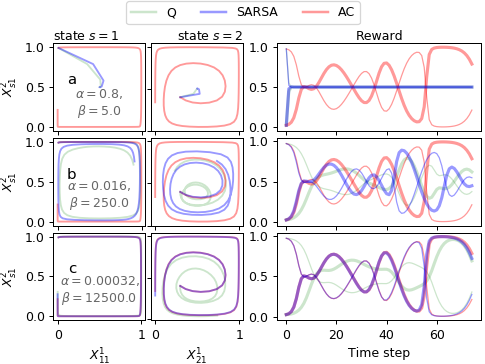

/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


In [20]:
alpha = 0.8
beta = 5.0
gamma = 0.9

X1 = obt_behavior(X000=0.01, X100=0.99, X010=0.3, X110=0.4)

Qalph, ACalph, Salph = 0.2, 0.4, 0.4
Qmark, ACmark, Smark = None, None, None #"x", "^", "v"

Tmax = 75
T, R = Tmp, Rmp

fact = 50


learnerfontsize=12
fsf = 0.9
# ==========================================================
fig = plt.figure(figsize=(fsf*6, fsf*4.5))

gs_left = gridspec.GridSpec(3, 2)
gs_right = gridspec.GridSpec(3, 1)

gs_left.update(right=0.5)
gs_right.update(left=0.57)
gs_left.update(wspace=0.06)

axA0 = fig.add_subplot(gs_left[0, 0], xticklabels=[])
axA1 = fig.add_subplot(gs_left[0, 1], yticklabels=[], xticklabels=[])
axAR = fig.add_subplot(gs_right[0, 0], xticklabels=[])


axA0.annotate(r"state $s=1$", (0.0, 1.0), textcoords="axes fraction",
              ha="left", va="bottom")
axA0.set_title("")
axA1.annotate(r"state $s=2$", (1.0, 1.0),
              textcoords="axes fraction", ha="right", va="bottom")
axA1.set_title("")
axA0.set_ylabel(r"$X^2_{s1}$")
axAR.annotate("Reward", (0.5, 1.0), textcoords="axes fraction", 
              ha="center", va="bottom")

axB0 = fig.add_subplot(gs_left[1, 0],  xticklabels=[])
axB1 = fig.add_subplot(gs_left[1, 1],  yticklabels=[], xticklabels=[])
axBR = fig.add_subplot(gs_right[1, 0],  xticklabels=[])
axB0.set_ylabel(r"$X^2_{s1}$")

axC0 = fig.add_subplot(gs_left[2, 0])
axC1 = fig.add_subplot(gs_left[2, 1], yticklabels=[])
axCR = fig.add_subplot(gs_right[2, 0]) 
axC0.set_ylabel(r"$X^2_{s1}$")
axC0.set_xlabel(r"$X^1_{11}$")
axC1.set_xlabel(r"$X^1_{21}$")
axCR.set_xlabel("Time step")



axA0.annotate("a", (0.25, 0.5),
              fontsize=learnerfontsize,
              textcoords="axes fraction", ha="right", va="bottom")

axB0.annotate("b", (0.25, 0.5),
              fontsize=learnerfontsize,
              textcoords="axes fraction", ha="right", va="bottom")

axC0.annotate("c", (0.25, 0.5),
              fontsize=learnerfontsize,
              textcoords="axes fraction", ha="right", va="bottom")
#
# Top panel: 
#
axA0.annotate(r"$\alpha = {},$".format(alpha)+"\n"+r"$\beta={}$".format(beta),
              (0.5, 0.12),
              textcoords="axes fraction", color=(.4, .4, .4),
              va="bottom",  ha="center")
#-- 
ACagents = JacobiAC(T, R, alpha, beta, gamma)
Sagents = JacobiSARSA(T, R, alpha, beta, gamma)
Qagents = JacobiQ(T, R, alpha, beta, gamma)

rtQ, fprQ = plot_trajectory(Qagents, X1, axes=[axA0, axA1],
                            Tmax=Tmax, color=Qcol,
                            alpha=Qalph, marker=Qmark,
                            markersize=msize, fpepsilon=-1)
#axAR.plot(rtQ, marker=Qmark, markersize=msize, alpha=Qalph, color=Qcol)
axAR.plot(np.array(rtQ)[:, 0], lw=blw, color=Qcol, alpha=Qalph)
axAR.plot(np.array(rtQ)[:, 1], lw=tlw, color=Qcol, alpha=Qalph)


rtAC, fprAC = plot_trajectory(ACagents, X1, axes=[axA0, axA1],
                            Tmax=Tmax, color=ACcol,
                            alpha=ACalph, marker=ACmark,
                            markersize=msize, fpepsilon=-1)
#axAR.plot(rtAC, marker=ACmark, markersize=msize, alpha=ACalph, color=ACcol)
axAR.plot(np.array(rtAC)[:, 0], lw=blw, color=ACcol, alpha=ACalph)
axAR.plot(np.array(rtAC)[:, 1], lw=tlw, color=ACcol, alpha=ACalph)

rtS, fprS = plot_trajectory(Sagents, X1, axes=[axA0, axA1],
                            Tmax=Tmax, color=Scol,
                            alpha=Salph, marker=Smark,
                            markersize=msize, fpepsilon=-1)
#axAR.plot(rtS, marker=Smark, markersize=msize, alpha=Salph, color=Scol)
axAR.plot(np.array(rtS)[:, 0], lw=blw, color=Scol, alpha=Salph)
axAR.plot(np.array(rtS)[:, 1], lw=tlw, color=Scol, alpha=Salph)
# ---



#
# Mid panel: 
#
beta *= fact
alpha /= fact
axB0.annotate(r"$\alpha = {},$".format(alpha)+"\n"+r"$\beta={}$".format(beta),
              (0.5, 0.15),
              textcoords="axes fraction", color=(.4, .4, .4),
              va="bottom",  ha="center")

ACagents = JacobiAC(T, R, alpha, beta, gamma)
Sagents = JacobiSARSA(T, R, alpha, beta, gamma)
Qagents = JacobiQ(T, R, alpha, beta, gamma)

rtQ, fprQ = plot_trajectory(Qagents, X1, axes=[axB0, axB1],
                            Tmax=Tmax, color=Qcol,
                            alpha=Qalph, marker=Qmark,
                            markersize=msize, fpepsilon=-1)
#axBR.plot(rtQ, marker=Qmark, markersize=msize, alpha=Qalph, color=Qcol)
axBR.plot(np.array(rtQ)[:, 0], lw=blw, color=Qcol, alpha=Qalph)
axBR.plot(np.array(rtQ)[:, 1], lw=tlw, color=Qcol, alpha=Qalph)

rtAC, fprAC = plot_trajectory(ACagents, X1, axes=[axB0, axB1],
                            Tmax=Tmax, color=ACcol,
                            alpha=ACalph, marker=ACmark,
                            markersize=msize, fpepsilon=-1)
#axBR.plot(rtAC, marker=ACmark, markersize=msize, alpha=ACalph, color=ACcol)
axBR.plot(np.array(rtAC)[:, 0], lw=blw, color=ACcol, alpha=ACalph)
axBR.plot(np.array(rtAC)[:, 1], lw=tlw, color=ACcol, alpha=ACalph)

rtS, fprS = plot_trajectory(Sagents, X1, axes=[axB0, axB1],
                            Tmax=Tmax, color=Scol,
                            alpha=Salph, marker=Smark,
                            markersize=msize, fpepsilon=-1)
#axBR.plot(rtS, marker=Smark, markersize=msize, alpha=Salph, color=Scol)
axBR.plot(np.array(rtS)[:, 0], lw=blw, color=Scol, alpha=Salph)
axBR.plot(np.array(rtS)[:, 1], lw=tlw, color=Scol, alpha=Salph)

#
# Bot panel: 
#
beta *= fact
alpha /= fact
axC0.annotate(r"$\alpha = {},$".format(alpha)+"\n"+r"$\beta={}$".format(beta),
              (0.5, 0.15),
              textcoords="axes fraction", color=(.4, .4, .4),
              va="bottom",  ha="center")

ACagents = JacobiAC(T, R, alpha, beta, gamma)
Sagents = JacobiSARSA(T, R, alpha, beta, gamma)
Qagents = JacobiQ(T, R, alpha, beta, gamma)

rtQ, fprQ = plot_trajectory(Qagents, X1, axes=[axC0, axC1],
                            Tmax=Tmax, color=Qcol,
                            alpha=Qalph, marker=Qmark,
                            markersize=msize, fpepsilon=-1)
#axCR.plot(rtQ, marker=Qmark, markersize=msize, alpha=Qalph, color=Qcol)
axCR.plot(np.array(rtQ)[:, 0], lw=blw, color=Qcol, alpha=Qalph)
axCR.plot(np.array(rtQ)[:, 1], lw=tlw, color=Qcol, alpha=Qalph)

rtAC, fprAC = plot_trajectory(ACagents, X1, axes=[axC0, axC1],
                            Tmax=Tmax, color=ACcol,
                            alpha=ACalph, marker=ACmark,
                            markersize=msize, fpepsilon=-1)
#axCR.plot(rtAC, marker=ACmark, markersize=msize, alpha=ACalph, color=ACcol)
axCR.plot(np.array(rtAC)[:, 0], lw=blw, color=ACcol, alpha=ACalph)
axCR.plot(np.array(rtAC)[:, 1], lw=tlw, color=ACcol, alpha=ACalph)

rtS, fprS = plot_trajectory(Sagents, X1, axes=[axC0, axC1],
                            Tmax=Tmax, color=Scol,
                            alpha=Salph, marker=Smark,
                            markersize=msize, fpepsilon=-1)
#axCR.plot(rtS, marker=Smark, markersize=msize, alpha=Salph, color=Scol)
axCR.plot(np.array(rtS)[:, 0], lw=blw, color=Scol, alpha=Salph)
axCR.plot(np.array(rtS)[:, 1], lw=tlw, color=Scol, alpha=Salph)
#
#    LEGEND
#
custom_lines = [Line2D([0], [0], color=Qcol, alpha=Qalph, lw=2),
                Line2D([0], [0], color=Scol, alpha=Salph, lw=2),
                Line2D([0], [0], color=ACcol, alpha=ACalph, lw=2)]
axA1.legend(custom_lines, ['Q', 'SARSA', 'AC'], ncol=3, loc='center', bbox_to_anchor=(1.0, 1.35))

plt.subplots_adjust(hspace=0.08, right=0.99, left=0.11, bottom=0.12)

plt.savefig(plotsavepath +  "MP_alphabetaconst.png", dpi=300)


## MP Bif Diag - along gamma

### [MPBDgam] computing data

In [21]:
alpha = 0.8
beta = 5.0
gammas = np.arange(0.02, 0.998, 0.03)

transients = 100000
iterations = 1000

Xinit1 = obt_behavior(X000=0.01, X100=0.99, X010=0.3, X110=0.4)
Xinit2 = obt_behavior(X000=1.0, X100=1., X010=0.01, X110=1.0)

In [22]:
nrofparams = len(gammas)

for AClass, Xinit in zip([JacobiAC, JacobiQ, JacobiSARSA],
                         [Xinit1, Xinit1, Xinit1]):
    fn = f"MPenv_BDalongGamma_AType{str(AClass)[14]}.p"
    if os.path.exists(datapath+fn):
        print("Skipping", str(AClass)[14])
        continue
    
    print("Computing", str(AClass)[14])
    Xkeep = np.zeros((nrofparams, iterations, 2, 2, 2))
    diags = np.ones((nrofparams, iterations, 4)) * 42
    SDkeep = np.zeros((nrofparams, iterations))

    for ip, gamma in enumerate(gammas):
        print(100 * ip/nrofparams, "%", end="\r")
        agents = AClass(Tmp, Rmp, alpha, beta, gamma)
        X = Xinit

        for t in range(transients):
            X = agents.TDstep(X)  

        J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
        q, r = np.linalg.qr(J)

        for t in range(iterations):
            X = agents.TDstep(X)

            J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
            q, r = np.linalg.qr(np.dot(J, q))
            diags[ip, t, :] = r.diagonal()

            Xkeep[ip, t] = X
            #SDkeep[ip, t] = agents.obtain_statdist(X)[0] 
        del agents

    LCEs = np.real(np.log(diags + 0j))
    LCEs = LCEs.mean(axis=1)


    # saving
    sdict = dict(alpha=alpha, beta=beta, gamma=gammas,
                 Xkeep=Xkeep, SDkeep=SDkeep, LCEs=LCEs,
                 diags=diags)
    pickle.dump( sdict, open(datapath + fn, "wb" ) )
    print(" ")

Computing A
 6.96969696969697 %%
Computing Q
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmax

[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


In [23]:
Adict = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeA.p",
                         "rb"))
Qdict = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeQ.p",
                         "rb"))
Sdict = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeS.p",
                         "rb"))

### [MPBDgam] checking convergence

<IPython.core.display.Javascript object>


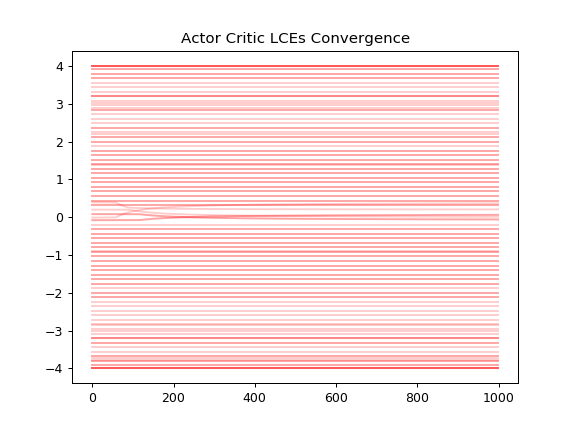

In [24]:
plt.figure()
plt.title("Actor Critic LCEs Convergence")

diags = Adict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=ACcol, alpha=0.2
        )

<IPython.core.display.Javascript object>


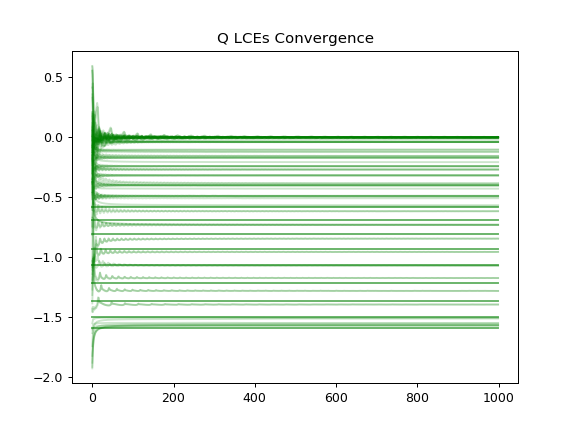

In [25]:
plt.figure()
plt.title("Q LCEs Convergence")

diags = Qdict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=Qcol, alpha=0.2
        )

<IPython.core.display.Javascript object>


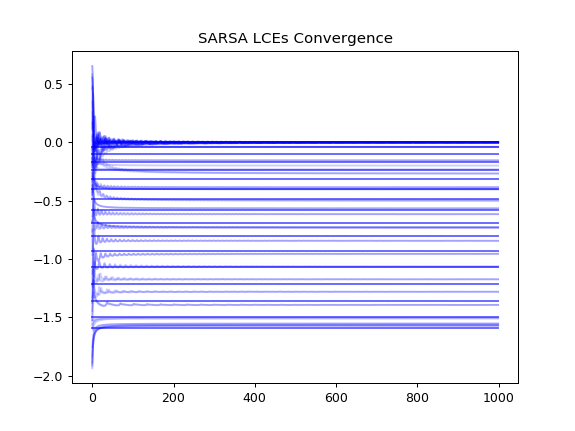

In [25]:
plt.figure()
plt.title("SARSA LCEs Convergence")

diags = Sdict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=Scol, alpha=0.2
        )

### [MPBDgam] plotting 

<IPython.core.display.Javascript object>


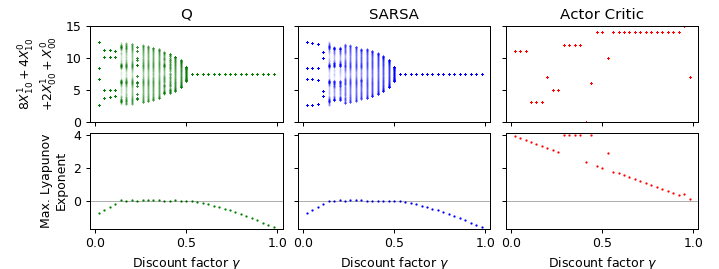

In [26]:
lyapuYLIM = (-1.7, 4.1)
BifYLIM = (0, 15)
xlabel = r"Discount factor $\gamma$"
xticks = [0.0, 0.5, 1.0]
BifYlabel = r"$8 X^1_{10} + 4 X^0_{10}$" +"\n" + r"$+ 2 X^1_{00} + X^0_{00}$"
lyapuYlabel = "Max. Lyapunov\nExponent"
BifMS = 0.1
LyaMS = 0.8
BifAlph = 0.3

fsf=0.5
plt.figure(figsize=(fsf*16, fsf*6))
#plt.subplots_adjust(hspace = 0.1)

Ddict = Qdict

ax12 = plt.subplot(234, ylim=lyapuYLIM, xlabel=xlabel, xticks=xticks, ylabel=lyapuYlabel)
ax11 = plt.subplot(231, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   ylabel=BifYlabel, title="Q")

ax11.plot(gammas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=Qcol, alpha=BifAlph);

lyapunov = Ddict["LCEs"].max(axis=1)
ax12.plot(gammas, lyapunov, "o", color=Qcol, ms=LyaMS)


Ddict = Sdict
ax21 = plt.subplot(232, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   yticklabels=[], title="SARSA")
ax22 = plt.subplot(235, ylim=lyapuYLIM, yticklabels=[], xlabel=xlabel, xticks=xticks)

ax21.plot(gammas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=Scol, alpha=BifAlph)

lyapunov = Ddict["LCEs"].max(axis=1)
ax22.plot(gammas, lyapunov, "o", color=Scol, ms=LyaMS)


Ddict = Adict

ax31 = plt.subplot(233, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   yticklabels=[], title="Actor Critic")
ax32 = plt.subplot(236, ylim=lyapuYLIM, yticklabels=[], xlabel=xlabel, xticks=xticks)

ax31.plot(gammas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=ACcol, alpha=BifAlph)

lyapunov = Ddict["LCEs"].max(axis=1)
ax32.plot(gammas, lyapunov, "o", color=ACcol, ms=LyaMS)

plt.subplots_adjust(wspace=0.08, hspace=0.12, bottom=0.15, top=0.9, right=0.97)
ax12.axhline(0, color='k', lw=.5, alpha=.5)
ax22.axhline(0, color='k', lw=.5, alpha=.5)
ax32.axhline(0, color='k', lw=.5, alpha=.5)

plt.savefig(plotsavepath +  "MP_BD_alongGamma.png", dpi=300)

## MP Bif Diag - along alpha

### [MPBDalph] computing data

In [27]:
gamma = 0.1
beta = 5.0
alphas = np.arange(0.02, 0.998, 0.03)

transients = 100000
iterations = 1000

#transients = 500
#iterations = 500

Xinit1 = obt_behavior(X000=0.01, X100=0.99, X010=0.3, X110=0.4)
Xinit2 = obt_behavior(X000=1.0, X100=1., X010=0.01, X110=1.0)

In [28]:
nrofparams = len(alphas)

for AClass, Xinit in zip([JacobiAC, JacobiQ, JacobiSARSA],
                         [Xinit1, Xinit1, Xinit1]):
    fn = f"MPenv_BDalongAlpha_AType{str(AClass)[14]}.p"
    if os.path.exists(datapath+fn):
        print("Skipping", str(AClass)[14])
        continue
    
    print("Computing", str(AClass)[14])
    Xkeep = np.zeros((nrofparams, iterations, 2, 2, 2))
    diags = np.ones((nrofparams, iterations, 4)) * 42
    SDkeep = np.zeros((nrofparams, iterations))

    for ip, alpha in enumerate(alphas):
        print(100 * ip/nrofparams, "%", end="\r")
        agents = AClass(Tmp, Rmp, alpha, beta, gamma)
        X = Xinit

        for t in range(transients):
            X = agents.TDstep(X)  

        J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
        q, r = np.linalg.qr(J)

        for t in range(iterations):
            X = agents.TDstep(X)

            J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
            q, r = np.linalg.qr(np.dot(J, q))
            diags[ip, t, :] = r.diagonal()

            Xkeep[ip, t] = X
            #SDkeep[ip, t] = agents.obtain_statdist(X)[0] 
        del agents

    LCEs = np.real(np.log(diags + 0j))
    LCEs = LCEs.mean(axis=1)


    # saving
    sdict = dict(alpha=alphas, beta=beta, gamma=gamma,
                 Xkeep=Xkeep, SDkeep=SDkeep, LCEs=LCEs,
                 diags=diags)
    pickle.dump( sdict, open(datapath + fn, "wb" ) )
    print(" ")

Computing A
 6.96969696969697 %%
Computing Q
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmax

[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)
[dmaxQisa] WARNING: no unqie maxis (EXPERIMENTAL)


In [29]:
Adict = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeA.p",
                         "rb"))
Qdict = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeQ.p",
                         "rb"))
Sdict = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeS.p",
                         "rb"))

### [MPBDalph] checking convergence

<IPython.core.display.Javascript object>


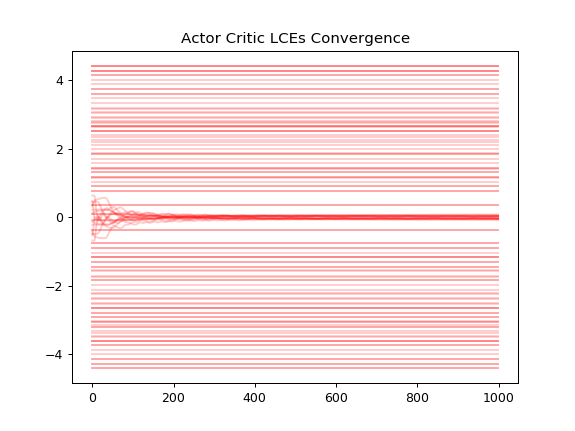

In [30]:
plt.figure()
plt.title("Actor Critic LCEs Convergence")

diags = Adict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=ACcol, alpha=0.2
        )

<IPython.core.display.Javascript object>


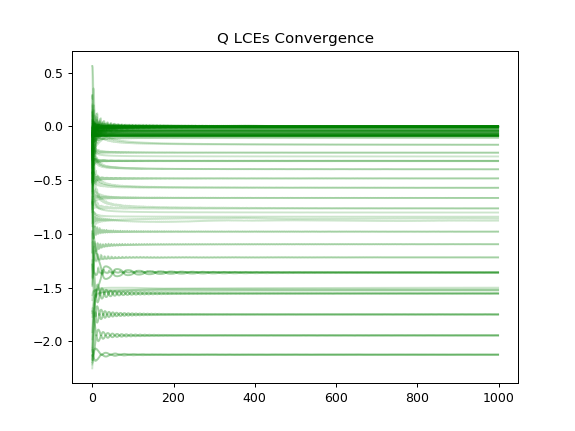

In [32]:
plt.figure()
plt.title("Q LCEs Convergence")

diags = Qdict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=Qcol, alpha=0.2
        )

<IPython.core.display.Javascript object>


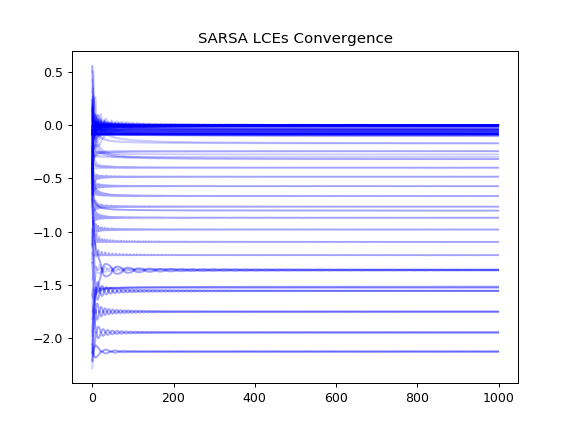

In [31]:
plt.figure()
plt.title("SARSA LCEs Convergence")

diags = Sdict["diags"]
lceTraj = np.real(np.log(diags +0j))


for i in range(nrofparams):
    plt.plot(
        np.cumsum(lceTraj[i,:], axis=0) /
        np.arange(1,iterations+1)[:, np.newaxis],
        color=Scol, alpha=0.2
        )

### [MPBDalph] plotting 

In [32]:
def f(Xkeep):
    return Xkeep[:,:,0,0,0] +\
        2 * Xkeep[:,:,1,0,0] +\
        4 * Xkeep[:,:,0,1,0] +\
        8 * Xkeep[:,:,1,1,0]

<IPython.core.display.Javascript object>


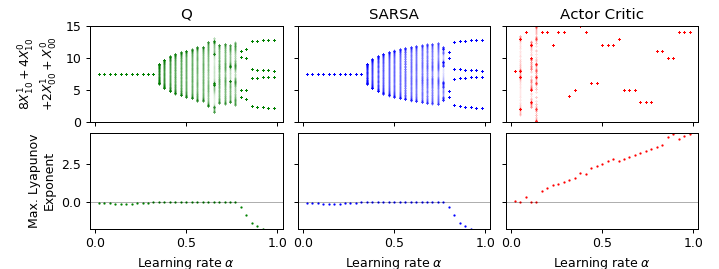

In [33]:
lyapuYLIM = (-1.7, 4.5)
BifYLIM = (0, 15)
xlabel = r"Learning rate $\alpha$"
xticks = [0.0, 0.5, 1.0]
BifYlabel = r"$8 X^1_{10} + 4 X^0_{10}$" +"\n" + r"$+ 2 X^1_{00} + X^0_{00}$"
lyapuYlabel = "Max. Lyapunov\nExponent"
BifMS = 0.1
LyaMS = 0.8
BifAlph = 0.3

fsf=0.5
plt.figure(figsize=(fsf*16, fsf*6))
#plt.subplots_adjust(hspace = 0.1)

Ddict = Qdict

ax12 = plt.subplot(234, ylim=lyapuYLIM, xlabel=xlabel, xticks=xticks, ylabel=lyapuYlabel)
ax11 = plt.subplot(231, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   ylabel=BifYlabel, title="Q")

ax11.plot(alphas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=Qcol, alpha=BifAlph);

lyapunov = Ddict["LCEs"].max(axis=1)
ax12.plot(alphas, lyapunov, "o", color=Qcol, ms=LyaMS)


Ddict = Sdict
ax21 = plt.subplot(232, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   yticklabels=[], title="SARSA")
ax22 = plt.subplot(235, ylim=lyapuYLIM, yticklabels=[], xlabel=xlabel, xticks=xticks)

ax21.plot(alphas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=Scol, alpha=BifAlph)

lyapunov = Ddict["LCEs"].max(axis=1)
ax22.plot(alphas, lyapunov, "o", color=Scol, ms=LyaMS)


Ddict = Adict

ax31 = plt.subplot(233, ylim=BifYLIM, xticks=xticks, xticklabels=[],
                   yticklabels=[], title="Actor Critic")
ax32 = plt.subplot(236, ylim=lyapuYLIM, yticklabels=[], xlabel=xlabel, xticks=xticks)

ax31.plot(alphas, f(Ddict["Xkeep"]), ".",
         ms=BifMS, color=ACcol, alpha=BifAlph)

lyapunov = Ddict["LCEs"].max(axis=1)
ax32.plot(alphas, lyapunov, "o", color=ACcol, ms=LyaMS)

plt.subplots_adjust(wspace=0.08, hspace=0.12, bottom=0.15, top=0.9, right=0.97)
ax12.axhline(0, color='k', lw=.5, alpha=.5)
ax22.axhline(0, color='k', lw=.5, alpha=.5)
ax32.axhline(0, color='k', lw=.5, alpha=.5)

plt.savefig(plotsavepath +  "MP_BD_alongAlpha.png", dpi=300)

In [37]:
Adict["LCEs"];

### (MP BD) Plot

In [38]:
AdictG = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeA.p",
                         "rb"))
QdictG = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeQ.p",
                         "rb"))
SdictG = pickle.load(open(datapath+"MPenv_BDalongGamma_ATypeS.p",
                         "rb"))

AdictA = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeA.p",
                         "rb"))
QdictA = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeQ.p",
                         "rb"))
SdictA = pickle.load(open(datapath+"MPenv_BDalongAlpha_ATypeS.p",
                         "rb"))

In [39]:
QdictG["alpha"]

0.8

<IPython.core.display.Javascript object>


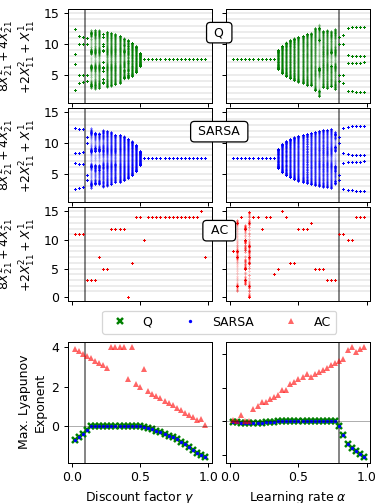

In [40]:
BifMS = 0.2
BifAlph = 0.3
LyaMS = 1.5
BifYlabel = r"$8 X^2_{21} + 4 X^1_{21}$" +"\n" + r"$+ 2 X^2_{11} + X^1_{11}$"
LyaYlabel = "Max. Lyapunov\nExponent"

fsf = 0.7
# ==========================================================
fig = plt.figure(figsize=(fsf*6, fsf*8))

BifGrid = gridspec.GridSpec(3,2)
LyaGrid = gridspec.GridSpec(1,2)

BifGrid.update(bottom=0.4, hspace=0.05)
LyaGrid.update(top=0.32)


axQg = fig.add_subplot(BifGrid[0, 0], xticklabels=[],
                       ylabel=BifYlabel)
axQa = fig.add_subplot(BifGrid[0, 1], xticklabels=[],
                       yticklabels=[])
axSg = fig.add_subplot(BifGrid[1, 0], xticklabels=[],
                       ylabel=BifYlabel)
axSa = fig.add_subplot(BifGrid[1, 1], xticklabels=[],
                       yticklabels=[])
axAg = fig.add_subplot(BifGrid[2, 0], xticklabels=[],
                       ylabel=BifYlabel, yticks=[0, 5, 10, 15])
axAa = fig.add_subplot(BifGrid[2, 1], xticklabels=[],
                       yticklabels=[], yticks=[0, 5, 10, 15])

axLg = fig.add_subplot(LyaGrid[0, 0], xlabel=r"Discount factor $\gamma$",
                       ylabel=LyaYlabel)
axLa = fig.add_subplot(LyaGrid[0, 1], xlabel=r"Learning rate $\alpha$",
                       yticklabels=[])


axQa.axvline(QdictG["alpha"], color="k", alpha=0.5)
axSa.axvline(QdictG["alpha"], color="k", alpha=0.5)
axAa.axvline(QdictG["alpha"], color="k", alpha=0.5)
axQg.axvline(QdictA["gamma"], color="k", alpha=0.5)
axSg.axvline(QdictA["gamma"], color="k", alpha=0.5)
axAg.axvline(QdictA["gamma"], color="k", alpha=0.5)
axLa.axvline(QdictG["alpha"], color="k", alpha=0.5)
axLg.axvline(QdictA["gamma"], color="k", alpha=0.5)

for li in range(1,16):
    axQa.axhline(li, color='k', lw=.3, alpha=.4)
    axQg.axhline(li, color='k', lw=.3, alpha=.4)
    axSa.axhline(li, color='k', lw=.3, alpha=.4)
    axSg.axhline(li, color='k', lw=.3, alpha=.4)
    axAa.axhline(li, color='k', lw=.3, alpha=.4)
    axAg.axhline(li, color='k', lw=.3, alpha=.4)
    
    
gammas = QdictG["gamma"]
axQg.plot(gammas, f(QdictG["Xkeep"]), ".",
          ms=BifMS, color=Qcol, alpha=BifAlph);
axSg.plot(gammas, f(SdictG["Xkeep"]), ".",
          ms=BifMS, color=Scol, alpha=BifAlph);
axAg.plot(gammas, f(AdictG["Xkeep"]), ".",
          ms=BifMS, color=ACcol, alpha=BifAlph);

alphas = QdictA["alpha"]
axQa.plot(alphas, f(QdictA["Xkeep"]), ".",
          ms=BifMS, color=Qcol, alpha=BifAlph);
axSa.plot(alphas, f(SdictA["Xkeep"]), ".",
          ms=BifMS, color=Scol, alpha=BifAlph);
axAa.plot(alphas, f(AdictA["Xkeep"]), ".",
          ms=BifMS, color=ACcol, alpha=BifAlph);
    

axLg.plot(gammas, QdictG["LCEs"].max(axis=1), "x", label="Q",
          color=Qcol, ms=3*LyaMS, alpha=1.0, mew=2.)
axLg.plot(gammas, SdictG["LCEs"].max(axis=1), "o", label="SARSA",
          color=Scol, ms=1.8*LyaMS, alpha=1, mew=0)
axLg.plot(gammas, AdictG["LCEs"].max(axis=1), "^", label="AC", alpha=0.6,
          color=ACcol, ms=3.5*LyaMS, mew=0)

axLa.plot(alphas, QdictA["LCEs"].max(axis=1), "x", label="Q",
          color=Qcol, ms=3*LyaMS, alpha=1.0, mew=2.)
axLa.plot(alphas, SdictA["LCEs"].max(axis=1), "o", label="SARSA",
          color=Scol, ms=1.8*LyaMS, alpha=1, mew=0)
axLa.plot(alphas, AdictA["LCEs"].max(axis=1), "^", label="AC", alpha=0.6,
          color=ACcol, ms=3.5*LyaMS, mew=0)
axLg.axhline(0, color='k', lw=.5, alpha=.5)
axLa.axhline(0, color='k', lw=.5, alpha=.5)

bbox_props = dict(boxstyle="round", fc="w", lw=1)
axQa.annotate(" Q ", (-0.05, 0.75), xycoords="axes fraction", ha="center", va="center", bbox=bbox_props)
axSa.annotate(" SARSA ", (-0.05, 0.75), xycoords="axes fraction", ha="center", va="center", bbox=bbox_props)
axAa.annotate(" AC ", (-0.05, 0.75), xycoords="axes fraction", ha="center", va="center", bbox=bbox_props)

axLa.legend(ncol=3, loc='center', bbox_to_anchor=(-0.05, 1.16))
plt.subplots_adjust(wspace=0.1, left=0.18, right=0.98,
                    bottom=0.08, top=0.98)

plt.savefig(plotsavepath +  "MP_BD.png", dpi=300)

## PD Phase Space - mid gamma

In [41]:
QWhat = "TDe"
alphas = [0.02, 0.8]
beta = 5.0
gamma = 0.45

In [42]:
pAs = [0.0, 0.1, 0.2, 0.3, 0.4,
       0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # for real<

#pAs = [0.0, 0.3, 0.6, 1.0] # for testing

<IPython.core.display.Javascript object>


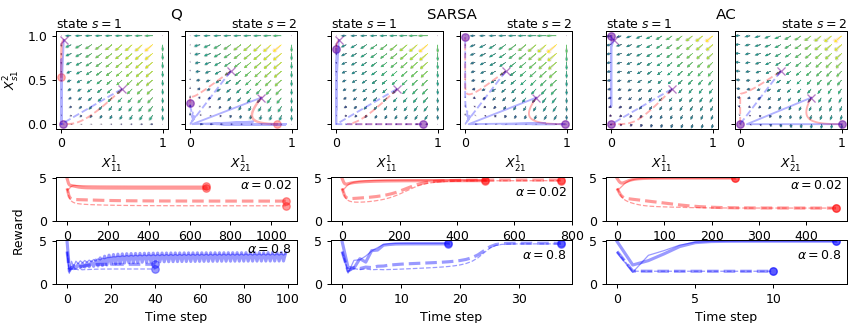

/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


In [43]:

fsf = 0.6
fig = plt.figure(figsize=(fsf*16, fsf*6))

left, right, bottom, top = 0.065, 0.98, 0.12, 0.9
hspace, wspace = 0.06, 0.02
w = (right-left-7*wspace) / 6
m = 0.6   # middle
uh = top - m  # upper hight
Nr = 2  # Nr of trajectory axes 
lh = (m - bottom - 2.5*hspace - (Nr-1)*hspace) / Nr

learnerfontsize=12

#
# AXES
#
axA0 = fig.add_axes((left, m, w, uh))
axA1 = fig.add_axes((left+1*w+1*wspace, m, w, uh), yticklabels=[])
axB0 = fig.add_axes((left+2*w+3*wspace, m, w, uh), yticklabels=[])
axB1 = fig.add_axes((left+3*w+4*wspace, m, w, uh), yticklabels=[])
axC0 = fig.add_axes((left+4*w+6*wspace, m, w, uh), yticklabels=[])
axC1 = fig.add_axes((left+5*w+7*wspace, m, w, uh), yticklabels=[])

tw = 2*w+wspace  # trajectory width
axAT0 = fig.add_axes((left, bottom+1*lh+1*hspace, tw, lh))
axAT1 = fig.add_axes((left, bottom, tw, lh))
axBT0 = fig.add_axes((left+2*w+3*wspace, bottom+1*lh+1*hspace, tw, lh), sharey=axAT0)
axBT1 = fig.add_axes((left+2*w+3*wspace, bottom, tw, lh), sharey=axAT1)
axCT0 = fig.add_axes((left+4*w+6*wspace, bottom+1*lh+1*hspace, tw, lh), sharey=axAT0)
axCT1 = fig.add_axes((left+4*w+6*wspace, bottom, tw, lh), sharey=axAT1)


#
# Quiver Plots
#
agentsQ = detQ(Tpd, Rpd, alphas[0], beta, gamma)
axes = plot_quiver(agentsQ, difftype=QWhat, axes=[axA0, axA1], pAs=pAs)
axA1.annotate("Q", (left+1*w+0.5*wspace, top+0.5*hspace),
              fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axA0.annotate(r"state $s=1$", (left, top), textcoords="figure fraction", ha="left", va="bottom")
axA0.set_title("")
axA1.annotate(r"state $s=2$", (left+2*w+1*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axA1.set_title("")
axA0.set_xlabel(r"$X^1_{11}$")
axA1.set_xlabel(r"$X^1_{21}$")
axA0.set_ylabel(r"$X^2_{s1}$")

agentsS = detSARSA(Tpd, Rpd, alphas[0], beta, gamma)
axes = plot_quiver(agentsS, difftype=QWhat, axes=[axB0, axB1], pAs=pAs)
axB1.annotate("SARSA", (left+3*w+3.5*wspace, top+0.5*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axB0.annotate(r"state $s=1$", (left+2*w+3*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axB0.set_title("")
axB1.annotate(r"state $s=2$", (left+4*w+4*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axB1.set_title("")
axB0.set_xlabel(r"$X^1_{11}$")
axB1.set_xlabel(r"$X^1_{21}$")
axB0.set_ylabel(r"")

agentsA = detAC(Tpd, Rpd, alphas[0], beta, gamma)
axes = plot_quiver(agentsA, difftype=QWhat, axes=[axC0, axC1], pAs=pAs)
axC1.annotate("AC", (left+5*w+6.5*wspace, top+0.5*hspace), fontsize=learnerfontsize,
              textcoords="figure fraction", ha="center", va="bottom")
axC0.annotate(r"state $s=1$", (left+4*w+6*wspace, top), textcoords="figure fraction", ha="left", va="bottom")
axC0.set_title("")
axC1.annotate(r"state $s=2$", (left+6*w+7*wspace, top),
              textcoords="figure fraction", ha="right", va="bottom")
axC1.set_title("")
axC0.set_xlabel(r"$X^1_{11}$")
axC1.set_xlabel(r"$X^1_{21}$")
axC0.set_ylabel(r"")

#
# Trajectories
# 
X = obt_behavior(X000=0.025, X100=0.95, X010=0.7, X110=0.3)

col, ls, alQ, alT = "red", "-", 0.3, 0.4
blw, tlw = 2.5, 1  # bold line width, thin line width
rt, fpr = plot_trajectory(agentsQ, X, axes=[axA0, axA1],
                          color=col, linestyle=ls, lw=2, alpha=alQ, Tmax=2000)
axAT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)

if fpr:
    axAT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)
    
# -----------------------------------------------------------------------------
col = "blue"
agentsQ1 = detQ(Tpd, Rpd, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsQ1, X, axes=[axA0, axA1],
                           color=col, linestyle=ls, alpha=alQ, Tmax=100)
axAT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axAT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

    
# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsS, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=2000)
axBT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsS1 = detSARSA(Tpd, Rpd, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsS1, X, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=1000)
axBT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "red"
rt, fpr = plot_trajectory(agentsA, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=4000)
axCT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

# -----------------------------------------------------------------------------
col = "blue"
agentsA1 = detAC(Tpd, Rpd, alphas[1], beta, gamma)
rt, fpr = plot_trajectory(agentsA1, X, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=200)
axCT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)
#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------

X2 = obt_behavior(X000=0.6, X100=0.4, X010=0.4, X110=0.6)
#-----------------------------------------------------------------------------
col, ls = "red", "--"
rt, fpr = plot_trajectory(agentsQ, X2, axes=[axA0, axA1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=4000)
axAT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axAT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

#-----------------------------------------------------------------------------
rt, fpr = plot_trajectory(agentsS, X2, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=4000)
axBT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

#-----------------------------------------------------------------------------
rt, fpr = plot_trajectory(agentsA, X2, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=4000)
axCT0.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT0.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT0.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)
#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------

X3 = obt_behavior(X000=0.1, X100=0.9, X010=0.225, X110=0.3)
X3 = X2
#-----------------------------------------------------------------------------
col = "purple"
col = "blue"
rt, fpr = plot_trajectory(agentsQ1, X3, axes=[axA0, axA1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=1000)
axAT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axAT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axAT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

#-----------------------------------------------------------------------------
rt, fpr = plot_trajectory(agentsS1, X3, axes=[axB0, axB1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=1000)
axBT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axBT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axBT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

#-----------------------------------------------------------------------------
rt, fpr = plot_trajectory(agentsA1, X3, axes=[axC0, axC1],
                          color=col, linestyle=ls, alpha=alQ, Tmax=1000)
axCT1.plot(np.array(rt)[:, 0], lw=blw, linestyle=ls, color=col, alpha=alT)
axCT1.plot(np.array(rt)[:, 1], lw=tlw, linestyle=ls, color=col, alpha=alT)
if fpr:
    axCT1.plot([len(rt)-1, len(rt)-1], rt[-1], "o", color=col, alpha=alT)

axAT1.set_xlabel("Time step")
axBT1.set_xlabel("Time step")
axCT1.set_xlabel("Time step")

axAT0.set_ylim(0, 5.1)
axAT1.set_ylim(0, 5.1)

axAT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.8), xycoords="axes fraction",
               ha="right", va="top")
axCT0.annotate(r"$\alpha = {}$".format(alphas[0]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axAT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.95), xycoords="axes fraction",
               ha="right", va="top")
axBT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.8), xycoords="axes fraction",
               ha="right", va="top")
axCT1.annotate(r"$\alpha = {}$".format(alphas[1]), (0.98, 0.8), xycoords="axes fraction",
               ha="right", va="top")

axAT0.annotate("Reward", (left-1.8*wspace, bottom+lh+0.5*hspace), xycoords="figure fraction",
               ha="right", va="center", rotation=90)

plt.savefig(plotsavepath +  "PD_PS_beta{}_gamma{}.png".format(fs(beta), fs(gamma)), dpi=300)

## PD Bif Diag - along gamma

### [PDBDgam] computing data

In [44]:
alpha = 0.2
beta = 5.0
gammas = np.arange(0.02, 0.998, 0.03)

In [45]:
transients = 5000
iterations = 1000

In [46]:
Xinit1 = obt_behavior(X000=0.5, X100=0.5, X010=0.5, X110=0.5)
Xinit2 = obt_behavior(X000=0.51, X100=0.49, X010=0.49, X110=0.51)

In [53]:
nrofparams = len(gammas)

for Xinit in [Xinit1, Xinit2]:

    for AClass in [JacobiAC, JacobiQ, JacobiSARSA]:
        fn = f"PDenv_BDalongGamma_AType{str(AClass)[14]}"+\
             f"_Xi000_{Xinit[0,0,0]}_Xi100_{Xinit[1,0,0]}"+\
             f"_Xi010_{Xinit[0,1,0]}_Xi110_{Xinit[1,1,0]}.p"
        if os.path.exists(datapath+fn):
            print("Skipping", str(AClass)[14])
            continue

        print("Computing", str(AClass)[14])
        Xkeep = np.zeros((nrofparams, iterations, 2, 2, 2))
        diags = np.ones((nrofparams, iterations, 4)) * 42
        SDkeep = np.zeros((nrofparams, iterations))

        for ip, gamma in enumerate(gammas):
            print(100 * ip/nrofparams, "%", end="\r")
            agents = AClass(Tpd, Rpd, alpha, beta, gamma)
            X = Xinit

            for t in range(transients):
                X = agents.TDstep(X)  

            J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
            q, r = np.linalg.qr(J)

            for t in range(iterations):
                X = agents.TDstep(X)

                J = agents.jacobi(X)[:,:,0,:,:,0].reshape(4,4)
                q, r = np.linalg.qr(np.dot(J, q))
                diags[ip, t, :] = r.diagonal()

                Xkeep[ip, t] = X
                SDkeep[ip, t] = agents.obtain_statdist(X)[0] 
            del agents

        LCEs = np.real(np.log(diags + 0j))
        LCEs = LCEs.mean(axis=1)


        # saving
        sdict = dict(alpha=alpha, beta=beta, gamma=gammas,
                     Xkeep=Xkeep, SDkeep=SDkeep, LCEs=LCEs)
        pickle.dump( sdict, open(datapath + fn, "wb" ) )
        print(" ")

Skipping A
Skipping Q
Skipping S
Skipping A
Skipping Q
Skipping S


In [54]:
fnX2 = "_Xi000_0.51_Xi100_0.49_Xi010_0.49_Xi110_0.51"
sAX2 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeA"+fnX2+".p", "rb"))
sQX2 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeQ"+fnX2+".p", "rb"))
sSX2 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeS"+fnX2+".p", "rb"))

fnX1 = "_Xi000_0.5_Xi100_0.5_Xi010_0.5_Xi110_0.5"
sAX1 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeA"+fnX1+".p", "rb"))
sQX1 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeQ"+fnX1+".p", "rb"))
sSX1 = pickle.load(open(datapath+"PDenv_BDalongGamma_ATypeS"+fnX1+".p", "rb"))


### [PDPDgam] plotting

<IPython.core.display.Javascript object>


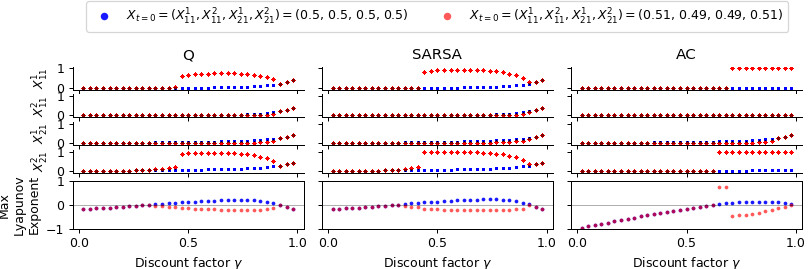

In [55]:
fsf=0.5
plt.figure(figsize=(fsf*18, fsf*6))

msize=3

lyapuYLIM = (-1., 1.)
BifYLIM = (-0.1, 1.1)
xlabel = r"Discount factor $\gamma$"
xticks = [0.0, 0.5, 1.0]
BifMS = 0.1
LyaMS = 0.8
BifAlph = 0.15

symX1 = "o"
symX2 = "o"
X1col = "blue"
X2col = "red"

X1colB = (0,0,1, 0.005)
X2colB = (1,0,0, 0.0075)

X1colL = (0,0,1, 0.9)
X2colL = (1,0,0, 0.65)

axQXa = plt.subplot(631, xticks=xticks, xticklabels=[], ylim=BifYLIM, title="Q")
axQXb = plt.subplot(634, xticks=xticks, xticklabels=[], ylim=BifYLIM)
axQXc = plt.subplot(637, xticks=xticks, xticklabels=[], ylim=BifYLIM)
axQXd = plt.subplot(6,3,10, xticks=xticks, xticklabels=[], ylim=BifYLIM)
axQL = plt.subplot(3,3,7, xticks=xticks, xlabel=xlabel, ylim=lyapuYLIM)
axSXa = plt.subplot(632, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[],
                    title="SARSA")
axSXb = plt.subplot(635, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[])
axSXc = plt.subplot(638, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[])
axSXd = plt.subplot(6,3,11, xticks=xticks, xticklabels=[], ylim=BifYLIM ,yticklabels=[])
axSL = plt.subplot(338, xticks=xticks, xlabel=xlabel, ylim=lyapuYLIM, yticklabels=[])
axAXa = plt.subplot(633, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[],
                    title="AC")
axAXb = plt.subplot(636, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[])
axAXc = plt.subplot(639, xticks=xticks, xticklabels=[], ylim=BifYLIM, yticklabels=[])
axAXd = plt.subplot(6,3,12, xticks=xticks, xticklabels=[], ylim=BifYLIM ,yticklabels=[])
axAL = plt.subplot(339, xticks=xticks, xlabel=xlabel, ylim=lyapuYLIM, yticklabels=[])


gammas = sQX1["gamma"]
axQXa.plot(gammas, sQX1["Xkeep"][:, :, 0, 0, 0],
           symX1, ms=msize, mfc=X1colB, mew=0);
axQXa.plot(gammas, sQX2["Xkeep"][:, :, 0, 0, 0],
           symX2, ms=msize, mfc=X2colB, mew=0);

axQXb.plot(gammas, sQX1["Xkeep"][:, :, 1, 0, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axQXb.plot(gammas, sQX2["Xkeep"][:, :, 1, 0, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axQXc.plot(gammas, sQX1["Xkeep"][:, :, 0, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axQXc.plot(gammas, sQX2["Xkeep"][:, :, 0, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axQXd.plot(gammas, sQX1["Xkeep"][:, :, 1, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axQXd.plot(gammas, sQX2["Xkeep"][:, :, 1, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);
###
axSXa.plot(gammas, sSX1["Xkeep"][:, :, 0, 0, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axSXa.plot(gammas, sSX2["Xkeep"][:, :, 0, 0, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axSXb.plot(gammas, sSX1["Xkeep"][:, :, 1, 0, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axSXb.plot(gammas, sSX2["Xkeep"][:, :, 1, 0, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axSXc.plot(gammas, sSX1["Xkeep"][:, :, 0, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axSXc.plot(gammas, sSX2["Xkeep"][:, :, 0, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0)

axSXd.plot(gammas, sSX1["Xkeep"][:, :, 1, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axSXd.plot(gammas, sSX2["Xkeep"][:, :, 1, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);
axAXa.plot(gammas, sAX1["Xkeep"][:, :, 0, 0, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axAXa.plot(gammas, sAX2["Xkeep"][:, :, 0, 0, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axAXb.plot(gammas, sAX1["Xkeep"][:, :, 1, 0, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axAXb.plot(gammas, sAX2["Xkeep"][:, :, 1, 0, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axAXc.plot(gammas, sQX1["Xkeep"][:, :, 0, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axAXc.plot(gammas, sQX2["Xkeep"][:, :, 0, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

axAXd.plot(gammas, sAX1["Xkeep"][:, :, 1, 1, 0],
          symX1, ms=msize, mfc=X1colB, mew=0);
axAXd.plot(gammas, sAX2["Xkeep"][:, :, 1, 1, 0],
          symX2, ms=msize, mfc=X2colB, mew=0);

#
#   LYAPUN
#
axQL.plot(gammas, sQX1["LCEs"].max(axis=1),
          symX1, ms=msize, mfc=X1colL, mew=0);
axQL.plot(gammas, sQX2["LCEs"].max(axis=1),
          symX2, ms=msize, mfc=X2colL, mew=0);

axSL.plot(gammas, sSX1["LCEs"].max(axis=1),
          symX1, ms=msize, mfc=X1colL, mew=0);
axSL.plot(gammas, sSX2["LCEs"].max(axis=1),
          symX2, ms=msize, mfc=X2colL, mew=0);

axAL.plot(gammas, sAX1["LCEs"].max(axis=1),
          symX1, ms=msize, mfc=X1colL, mew=0);
axAL.plot(gammas, sAX2["LCEs"].max(axis=1),
          symX2, ms=msize, mfc=X2colL, mew=0);



axQXa.set_ylabel(r"$X^1_{11}$")
axQXb.set_ylabel(r"$X^2_{11}$")
axQXc.set_ylabel(r"$X^1_{21}$")
axQXd.set_ylabel(r"$X^2_{21}$")
axQL.set_ylabel("Max\nLyapunov\nExponent")


axQXa.spines['right'].set_visible(False)
axQXa.spines['top'].set_visible(False)
axQXb.spines['right'].set_visible(False)
axQXb.spines['top'].set_visible(False)
axQXc.spines['right'].set_visible(False)
axQXc.spines['top'].set_visible(False)
axQXd.spines['right'].set_visible(False)
axQXd.spines['top'].set_visible(False)

axSXa.spines['right'].set_visible(False)
axSXa.spines['top'].set_visible(False)
axSXb.spines['right'].set_visible(False)
axSXb.spines['top'].set_visible(False)
axSXc.spines['right'].set_visible(False)
axSXc.spines['top'].set_visible(False)
axSXd.spines['right'].set_visible(False)
axSXd.spines['top'].set_visible(False)

axAXa.spines['right'].set_visible(False)
axAXa.spines['top'].set_visible(False)
axAXb.spines['right'].set_visible(False)
axAXb.spines['top'].set_visible(False)
axAXc.spines['right'].set_visible(False)
axAXc.spines['top'].set_visible(False)
axAXd.spines['right'].set_visible(False)
axAXd.spines['top'].set_visible(False)

axAL.axhline(0, color='k', lw=.5, alpha=.5)
axQL.axhline(0, color='k', lw=.5, alpha=.5)
axSL.axhline(0, color='k', lw=.5, alpha=.5)


#
#    LEGEND
#
custom_lines = [Line2D([0], [0], mfc=X1colL, mew=0, marker=symX1, linestyle="none"),
                Line2D([0], [0], mfc=X2colL, mew=0, marker=symX2, linestyle="none")]
prelsting = r"$X_{t=0} = (X^1_{11}, X^2_{11}, X^1_{21}, X^2_{21}) =$"
lstring1  = prelsting + f"({Xinit1[0,0,0]}, {Xinit1[1,0,0]}, "+\
    f"{Xinit1[0,1,0]}, {Xinit1[1,1,0]})"
lstring2  = prelsting + f"({Xinit2[0,0,0]}, {Xinit2[1,0,0]}, "+\
    f"{Xinit2[0,1,0]}, {Xinit2[1,1,0]})"
axSL.legend(custom_lines, [lstring1, lstring2],
            ncol=2, loc='center', bbox_to_anchor=(0.5, +4.45))
plt.subplots_adjust(wspace=0.08, bottom=0.15, top=0.75,
                    right=0.99, left=0.09)


plt.savefig(plotsavepath + "PD_BD_alongGamma.png", dpi=300)


In [49]:
r1 = np.zeros(len(gammas))
r2 = np.zeros(len(gammas))
sd = np.zeros(len(gammas))

for ig, gamma in enumerate(gammas):
    X = sAX2["Xkeep"][ig,0]
    agent = JacobiSARSA(Tpd, Rpd, alpha, beta, gamma)
    δ = agent.obtain_statdist(X)
    Ris = agent.obtain_Ris(X) 
    Ri = np.sum(δ.T * Ris, axis=1)
    r1[ig] = Ri[0]
    r2[ig] = Ri[1]
    sd[ig] = δ[0]

# PD 2

In [56]:
alpha = 0.016
beta = 250.0
gammas = np.arange(0.02, 0.998, 0.03)

In [57]:
transients = 5000
iterations = 1000

In [58]:
Xinit1 = obt_behavior(X000=0.5, X100=0.5, X010=0.5, X110=0.5)

Xinit1_s0 = obt_behavior_s0(X000=0.50, X100=0.50)

### [PD BD v2]  computing s2 data

In [59]:
nrofparams = len(gammas)

Xinit = Xinit1

for AClass in [JacobiSARSA, JacobiAC, JacobiQ]:
    fn = f"PDenv_v2_BDalongGamma_AType{str(AClass)[14]}"+\
         f"_Xi000_{Xinit[0,0,0]}_Xi100_{Xinit[1,0,0]}"+\
         f"_Xi010_{Xinit[0,1,0]}_Xi110_{Xinit[1,1,0]}.p"
    if os.path.exists(datapath+fn):
        print("Skipping", str(AClass)[14])
        continue
        
    print("Computing", str(AClass)[14])
    Xkeep = np.zeros((nrofparams, iterations, 2, 2, 2))
    diags = np.ones((nrofparams, iterations, 4)) * 42
    SDkeep = np.zeros((nrofparams, iterations))

    for ip, gamma in enumerate(gammas):
        print(100 * ip/nrofparams, "%", end="\r")
        agents = AClass(Tpd_, Rpd_, alpha, beta, gamma)
        X = Xinit

        for t in range(transients):
            X = agents.TDstep(X)  

        for t in range(iterations):
            X = agents.TDstep(X)

            Xkeep[ip, t] = X
        del agents
    # saving
    sdict = dict(alpha=alpha, beta=beta, gamma=gammas,
                 Xkeep=Xkeep)
    pickle.dump( sdict, open(datapath + fn, "wb" ) )
    print(" ")

Computing S
 6.96969696969697 %%
Computing A
 6.96969696969697 %%
Computing Q
 6.96969696969697 %%


### [PD BD v2]  computing s1 data

In [60]:
nrofparams = len(gammas)

Xinit = Xinit1_s0

for AClass in [JacobiSARSA, JacobiAC, JacobiQ]:
    fn = f"PDenv_v2_b1_BDalongGamma_AType{str(AClass)[14]}"+\
         f"_Xi000_{Xinit[0,0,0]}_Xi100_{Xinit[1,0,0]}.p"
    if os.path.exists(datapath+fn):
        print("Skipping", str(AClass)[14])
        continue
        
    print("Computing", str(AClass)[14])
    Xkeep = np.zeros((nrofparams, iterations, 2, 1, 2))
    
    for ip, gamma in enumerate(gammas):
        print(100 * ip/nrofparams, "%", end="\r")
        agents = AClass(Tpd_1, Rpd_1, alpha, beta, gamma)
        X = Xinit

        for t in range(transients):
            X = agents.TDstep(X)  

        for t in range(iterations):
            X = agents.TDstep(X)

            Xkeep[ip, t] = X
        del agents
    # saving
    sdict = dict(alpha=alpha, beta=beta, gamma=gammas,
                 Xkeep=Xkeep)
    pickle.dump( sdict, open(datapath + fn, "wb" ) )
    print(" ")

Computing S
 6.96969696969697 %%
Computing A
 6.96969696969697 %%
Computing Q
 6.96969696969697 %%


In [61]:
nrofparams = len(gammas)

Xinit = Xinit1_s0

for AClass in [JacobiSARSA, JacobiAC, JacobiQ]:
    fn = f"PDenv_v2_b2_BDalongGamma_AType{str(AClass)[14]}"+\
         f"_Xi000_{Xinit[0,0,0]}_Xi100_{Xinit[1,0,0]}.p"
    if os.path.exists(datapath+fn):
        print("Skipping", str(AClass)[14])
        continue
        
    print("Computing", str(AClass)[14])
    Xkeep = np.zeros((nrofparams, iterations, 2, 1, 2))
    
    for ip, gamma in enumerate(gammas):
        print(100 * ip/nrofparams, "%", end="\r")
        agents = AClass(Tpd_2, Rpd_2, alpha, beta, gamma)
        X = Xinit

        for t in range(transients):
            X = agents.TDstep(X)  

        for t in range(iterations):
            X = agents.TDstep(X)

            Xkeep[ip, t] = X
        del agents
    # saving
    sdict = dict(alpha=alpha, beta=beta, gamma=gammas,
                 Xkeep=Xkeep)
    pickle.dump( sdict, open(datapath + fn, "wb" ) )
    print(" ")

Computing S
 6.96969696969697 %%
Computing A
 6.96969696969697 %%
Computing Q
 6.96969696969697 %%


In [62]:
fnS2 = "_Xi000_0.5_Xi100_0.5_Xi010_0.5_Xi110_0.5"
fnS1 = "_Xi000_0.5_Xi100_0.5"

datS2 = pickle.load(open(datapath+"PDenv_v2_BDalongGamma_ATypeS"+fnS2+".p", "rb"))
datS1_b1 = pickle.load(open(datapath+"PDenv_v2_b1_BDalongGamma_ATypeS"+fnS1+".p", "rb"))
datS1_b2 = pickle.load(open(datapath+"PDenv_v2_b2_BDalongGamma_ATypeS"+fnS1+".p", "rb"))


## [PD BD v2] plotting

<IPython.core.display.Javascript object>


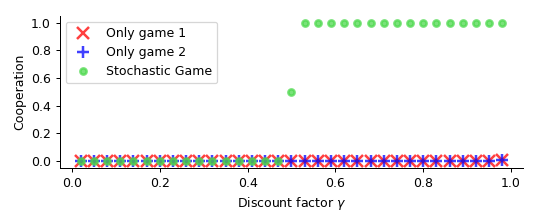

In [63]:
fig = plt.figure(figsize=[6, 2.5])
ax = fig.add_subplot(111)

cooperations_S2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datS2["Xkeep"]]
cooperations_S1_b1 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datS1_b1["Xkeep"]]
cooperations_S1_b2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datS1_b2["Xkeep"]]

msize = 10
S2col = (0.3,0.85,0.3, 0.75)
S1col_b1 = (1,0,0, 0.75)
S1col_b2 = (0,0,1, 0.75)

plt.plot(gammas, cooperations_S1_b2, "x", ms=10, mew=2, mfc=S1col_b1, mec=S1col_b1,
         label="Only game 1");
plt.plot(gammas, cooperations_S1_b1, "+", ms=10, mew=2, mfc=S1col_b2, mec=S1col_b2,
         label="Only game 2");

plt.plot(gammas, cooperations_S2, ".", ms=10, mew=2, mfc=S2col, mec=S2col,
         label="Stochastic Game");

plt.legend()

ax.set_xlabel(r"Discount factor $\gamma$")
ax.set_ylabel(r"Cooperation")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()


plt.savefig(plotsavepath +  "PDv2_BD.png", dpi=300)

## [PD BD v2] Q

In [64]:
fnS2 = "_Xi000_0.5_Xi100_0.5_Xi010_0.5_Xi110_0.5"
fnS1 = "_Xi000_0.5_Xi100_0.5"

datQ2 = pickle.load(open(datapath+"PDenv_v2_BDalongGamma_ATypeQ"+fnS2+".p", "rb"))
datQ1_b1 = pickle.load(open(datapath+"PDenv_v2_b1_BDalongGamma_ATypeQ"+fnS1+".p", "rb"))
datQ1_b2 = pickle.load(open(datapath+"PDenv_v2_b2_BDalongGamma_ATypeQ"+fnS1+".p", "rb"))


<IPython.core.display.Javascript object>


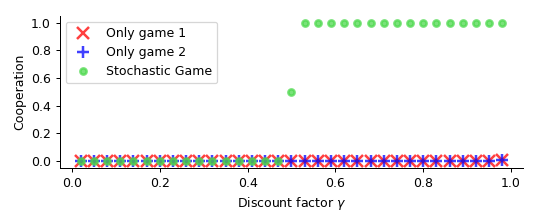

In [65]:
fig = plt.figure(figsize=[6, 2.5])
ax = fig.add_subplot(111)

cooperations_S2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datQ2["Xkeep"]]
cooperations_S1_b1 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datQ1_b1["Xkeep"]]
cooperations_S1_b2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datQ1_b2["Xkeep"]]

msize = 10
S2col = (0.3,0.85,0.3, 0.75)
S1col_b1 = (1,0,0, 0.75)
S1col_b2 = (0,0,1, 0.75)

plt.plot(gammas, cooperations_S1_b2, "x", ms=10, mew=2, mfc=S1col_b1, mec=S1col_b1,
         label="Only game 1");
plt.plot(gammas, cooperations_S1_b1, "+", ms=10, mew=2, mfc=S1col_b2, mec=S1col_b2,
         label="Only game 2");

plt.plot(gammas, cooperations_S2, ".", ms=10, mew=2, mfc=S2col, mec=S2col,
         label="Stochastic Game");

plt.legend()

ax.set_xlabel(r"Discount factor $\gamma$")
ax.set_ylabel(r"Cooperation")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()


## [PD BD v2] AC

In [66]:
fnS2 = "_Xi000_0.5_Xi100_0.5_Xi010_0.5_Xi110_0.5"
fnS1 = "_Xi000_0.5_Xi100_0.5"

datA2 = pickle.load(open(datapath+"PDenv_v2_BDalongGamma_ATypeA"+fnS2+".p", "rb"))
datA1_b1 = pickle.load(open(datapath+"PDenv_v2_b1_BDalongGamma_ATypeA"+fnS1+".p", "rb"))
datA1_b2 = pickle.load(open(datapath+"PDenv_v2_b2_BDalongGamma_ATypeA"+fnS1+".p", "rb"))


<IPython.core.display.Javascript object>


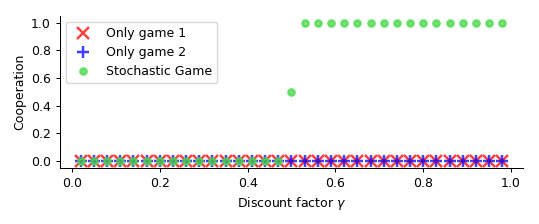

In [67]:
fig = plt.figure(figsize=[6, 2.5])
ax = fig.add_subplot(111)

cooperations_S2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datA2["Xkeep"]]
cooperations_S1_b1 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datA1_b1["Xkeep"]]
cooperations_S1_b2 = [tmp.mean(axis=(1,2))[0, 0] for tmp in datA1_b2["Xkeep"]]

msize = 10
S2col = (0.3,0.85,0.3, 0.75)
S1col_b1 = (1,0,0, 0.75)
S1col_b2 = (0,0,1, 0.75)

plt.plot(gammas, cooperations_S1_b2, "x", ms=10, mew=2, mfc=S1col_b1, mec=S1col_b1,
         label="Only game 1");
plt.plot(gammas, cooperations_S1_b1, "+", ms=10, mew=2, mfc=S1col_b2, mec=S1col_b2,
         label="Only game 2");

plt.plot(gammas, cooperations_S2, ".", ms=10, mew=2, mfc=S2col, mec=S2col,
         label="Stochastic Game");

plt.legend()

ax.set_xlabel(r"Discount factor $\gamma$")
ax.set_ylabel(r"Cooperation")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
